In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train_dataset_train.csv")

In [3]:
print("🔍 Пропущенные значения:\n", df.isnull().sum())
print("\n📦 Дубликаты:", df.duplicated().sum())

🔍 Пропущенные значения:
 id                    0
Текст Сообщения       0
Тематика              0
Ответственное лицо    0
Категория             0
dtype: int64

📦 Дубликаты: 0


In [4]:
category_counts = df['Категория'].value_counts().sort_index()

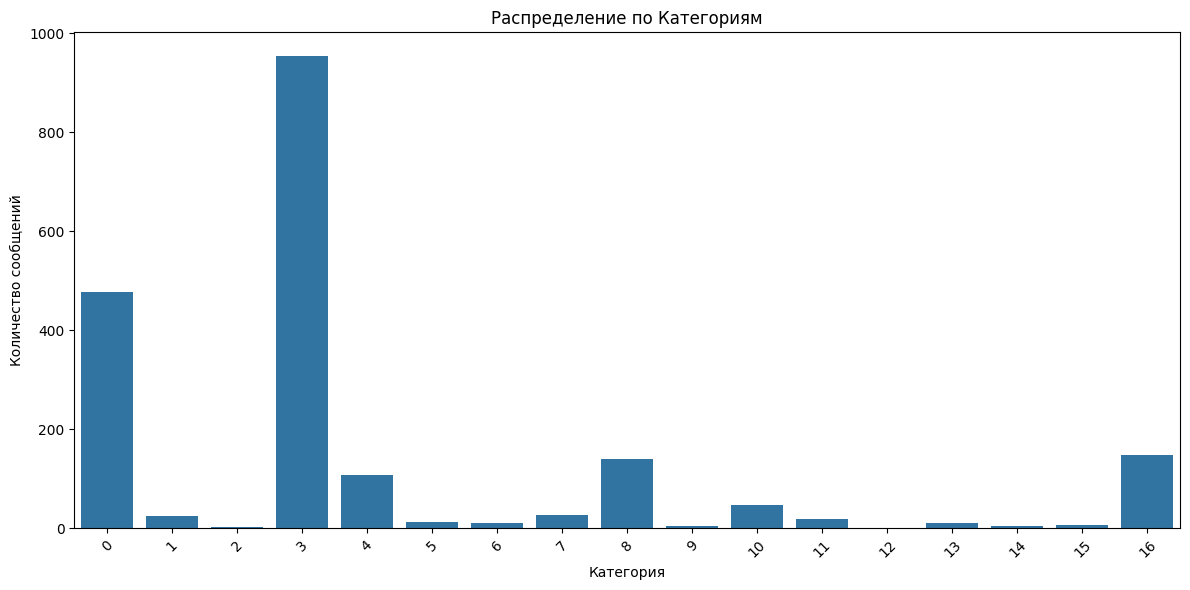

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Распределение по Категориям")
plt.xlabel("Категория")
plt.ylabel("Количество сообщений")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
print("\n📊 Топ 10 'Тематика':\n", df['Тематика'].value_counts().head(10))
print("\n📊 Топ 10 'Ответственное лицо':\n", df['Ответственное лицо'].value_counts().head(10))


📊 Топ 10 'Тематика':
 Тематика
Нарушение дорожного покрытия (ямы)  на дорогах в границах городских округов и сельских поселений                155
Неработающее наружное освещение                                                                                 108
Отсутствие люков на коммуникационных колодцах                                                                    90
Несанкционированные свалки твёрдых бытовых отходов                                                               85
Аварийные деревья                                                                                                79
Нарушение теплоснабжения многоквартирного дома                                                                   58
Некачественное водоснабжение многоквартирного дома                                                               51
Неудовлетворительная уборка улиц и тротуаров                                                                     50
Не соответствующий установленным нормам 

In [7]:
print("\n📈 Кол-во классов:", df['Категория'].nunique())
print("\n🎯 Распределение по классам:\n", category_counts)


📈 Кол-во классов: 17

🎯 Распределение по классам:
 Категория
0     478
1      25
2       3
3     954
4     108
5      12
6      10
7      27
8     139
9       5
10     48
11     19
12      1
13     11
14      4
15      7
16    149
Name: count, dtype: int64


In [8]:
# Примеры сообщений по 3 самым частым классам
top_categories = category_counts.sort_values(ascending=False).head(3).index
for cat in top_categories:
    print(f"\n📌 Примеры сообщений для категории {cat}:")
    print(df[df['Категория'] == cat]['Текст Сообщения'].sample(2, random_state=cat).to_string(index=False))


📌 Примеры сообщений для категории 3:
Добрый день, уже как месяц сломана лавочка на д...
Сквер Изумрудный, не работает второй фонарь со ...

📌 Примеры сообщений для категории 0:
<p>Добрый день, Около школы № 54 кварда &nbsp;в...
<p>Вдоль дороги по улице Песковка по обочинам р...

📌 Примеры сообщений для категории 16:
<p>Стоит старенький, почти разрушенный дом, вок...
<p>Добрый день, меня интересует почему никто не...


In [9]:
# --- 6. Балансировка классов ---
imbalance_ratio = category_counts.max() / max(1, category_counts.min())
print(f"\n⚖️ Классовый дисбаланс (макс/мин): ~{imbalance_ratio:.1f}x")


⚖️ Классовый дисбаланс (макс/мин): ~954.0x


In [12]:
# --- 8. Формулировка задачи в терминах ML ---
print("\n📘 Формулировка ML-задачи:")
print(f"""
- Тип задачи: Многоклассовая классификация
- Целевая переменная: 'Категория' (всего классов: {df['Категория'].nunique()})
- Признаки:
    - 'Текст Сообщения' (текстовый вход)
    - 'Тематика' (категориальный признак)
    - 'Ответственное лицо' (категориальный признак)
- Метрики: Accuracy, Macro-F1
- Особенности: Несбалансированные классы (дисбаланс ≈ {imbalance_ratio:.1f}x)
""")


📘 Формулировка ML-задачи:

- Тип задачи: Многоклассовая классификация
- Целевая переменная: 'Категория' (всего классов: 17)
- Признаки:
    - 'Текст Сообщения' (текстовый вход)
    - 'Тематика' (категориальный признак)
    - 'Ответственное лицо' (категориальный признак)
- Метрики: Accuracy, Macro-F1
- Особенности: Несбалансированные классы (дисбаланс ≈ 954.0x)



=== Пропуски в train ===
id                    0
Текст Сообщения       0
Тематика              0
Ответственное лицо    0
Категория             0
dtype: int64 

=== Дубликаты в train: 0 



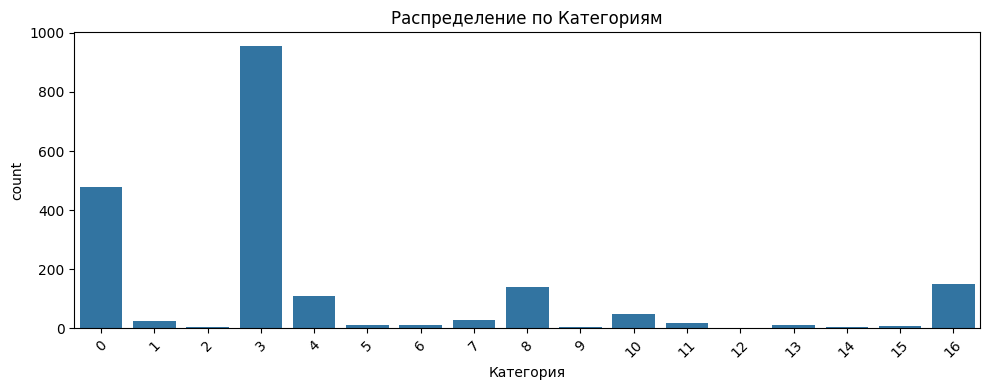

<ipython-input-14-1ef8fbeb3b0e>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


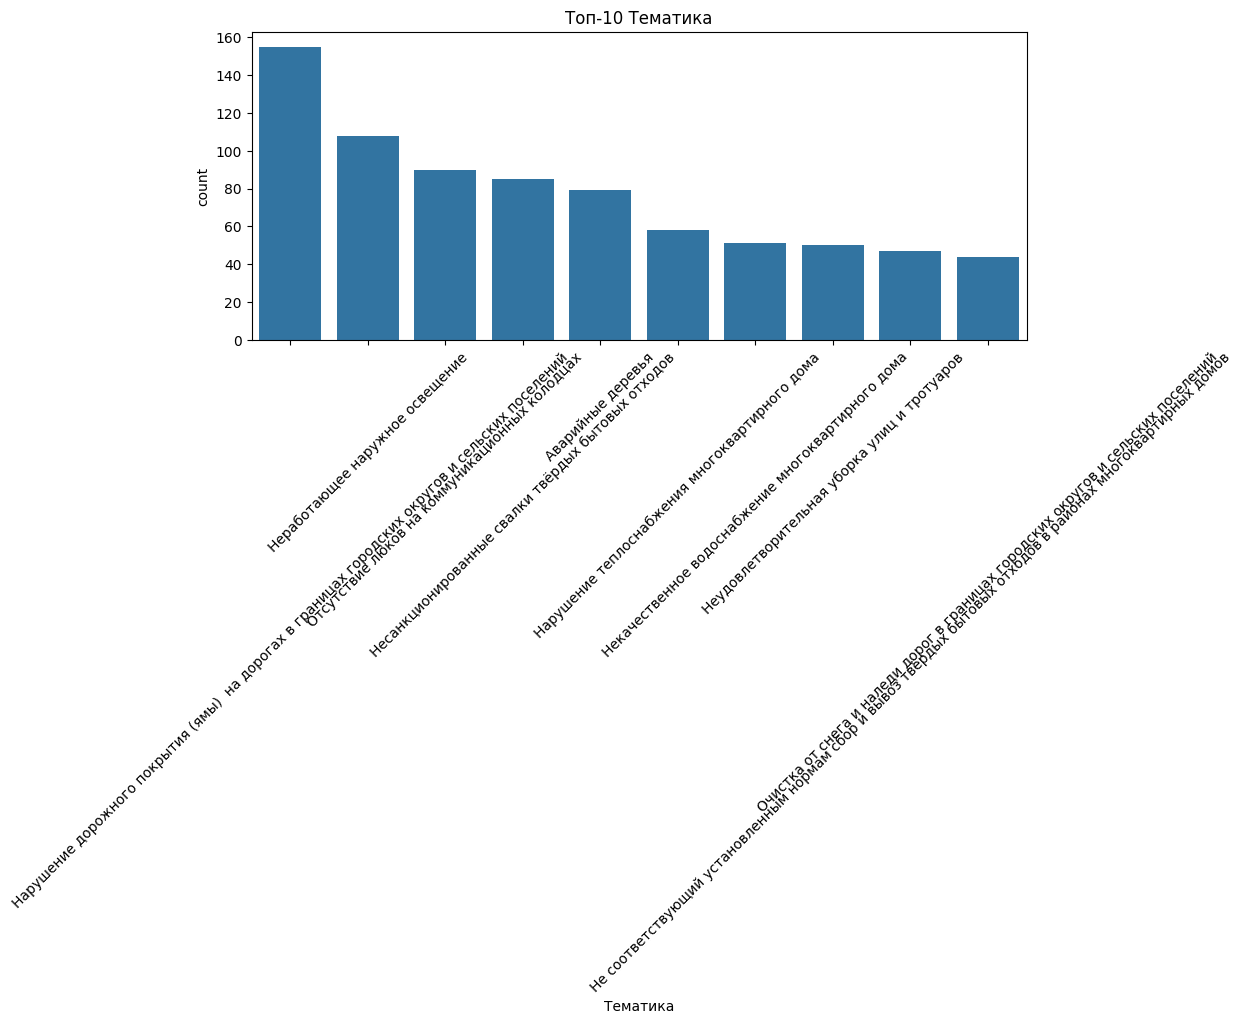

<ipython-input-14-1ef8fbeb3b0e>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


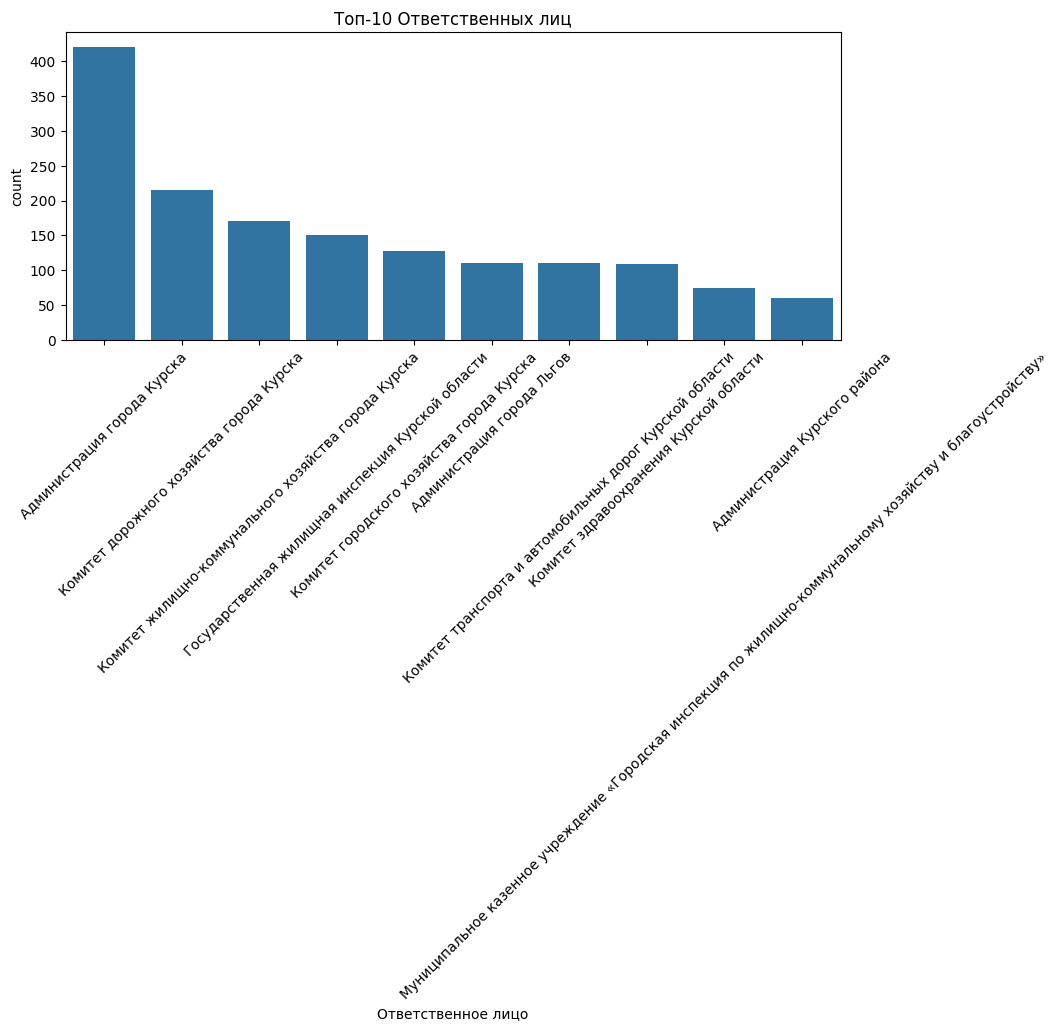

Число классов: 17
Распределение по классам:
 Категория
0     478
1      25
2       3
3     954
4     108
5      12
6      10
7      27
8     139
9       5
10     48
11     19
12      1
13     11
14      4
15      7
16    149
Name: count, dtype: int64 

Коэффициент дисбаланса (max/min): 954.0

Примеры для класса 3:
 - <p>Уважаемый Роман Владимирович! В нашей деревне нет нормальной воды! Мв пользуемся скважиной, но воду эту пить невозможно.Вся наша сантехника становится ржавой, одежду невозможно стирать, вида имеет жуткий металлический запах. Оказалось, что у нас есть водопровод, но подключать нас к нему никто не собирается! просим о помощи&nbsp;</p>
 - <p>Здравствуйте, на пересечении улиц Краснополянская и Дружбы имеется ужасный тротуар. Земельная насыпь выше по уровню чем тротуар и регулярно вся грязь собирается под ногами. При дожде вся грязь течёт под ноги и получается непроходимое болото. А так же после покоса травы всё это осталось на тротуаре. Просим установить бордюры по краям зе

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Пути к файлам
TRAIN_PATH = "train_dataset_train.csv"
TEST_PATH  = "test_dataset_test.csv"

def main():
    # 1. Загрузить датасеты
    train_df = pd.read_csv(TRAIN_PATH)
    test_df  = pd.read_csv(TEST_PATH)

    # 2. Проверить пропущенные значения и дубликаты
    print("=== Пропуски в train ===")
    print(train_df.isnull().sum(), "\n")
    print("=== Дубликаты в train:", train_df.duplicated().sum(), "\n")

    # 3. Построить распределение по Категориям
    plt.figure(figsize=(10,4))
    sns.countplot(x="Категория", data=train_df)
    plt.title("Распределение по Категориям")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Распределение по Тематика (топ-10)
    plt.figure(figsize=(10,4))
    top_topics = train_df['Тематика'].value_counts().head(10).index
    sns.countplot(x="Тематика", data=train_df, order=top_topics)
    plt.title("Топ-10 Тематика")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Распределение по Ответственное лицо (топ-10)
    plt.figure(figsize=(10,4))
    top_resp = train_df['Ответственное лицо'].value_counts().head(10).index
    sns.countplot(x="Ответственное лицо", data=train_df, order=top_resp)
    plt.title("Топ-10 Ответственных лиц")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 4. Описать классы: количество, балансировка, примеры
    class_counts = train_df['Категория'].value_counts().sort_index()
    n_classes = class_counts.size
    imbalance = class_counts.max() / class_counts.min()
    print(f"Число классов: {n_classes}")
    print("Распределение по классам:\n", class_counts, "\n")
    print(f"Коэффициент дисбаланса (max/min): {imbalance:.1f}\n")

    # Примеры для 3 самых частых классов
    top3 = class_counts.nlargest(3).index
    for cls in top3:
        examples = train_df[train_df['Категория']==cls]['Текст Сообщения'] \
                   .sample(2, random_state=42).tolist()
        print(f"Примеры для класса {cls}:")
        for ex in examples:
            print(" -", ex)
        print()

    # 5. Выделить train / valid (стратифицированное, без классов <2 примеров)
    rare = class_counts[class_counts<2].index.tolist()
    filtered = train_df[~train_df['Категория'].isin(rare)]
    train_split, valid_split = train_test_split(
        filtered,
        test_size=0.2,
        stratify=filtered['Категория'],
        random_state=42
    )
    print(f"Train size: {train_split.shape[0]}, Valid size: {valid_split.shape[0]}\n")

    # 6. Формулировка задачи в терминах ML
    task = f"""
Формулировка ML-задачи:
- Тип: Многоклассовая классификация
- Целевая переменная: 'Категория' ({n_classes} классов)
- Признаки:
    • 'Текст Сообщения' (текст)
    • 'Тематика' (категориальный)
    • 'Ответственное лицо' (категориальный)
- Метрики: Accuracy, Macro-F1
- Особенности: дисбаланс классов (~{imbalance:.1f}:1)
- Тестовый набор без целевой переменной для финальных предсказаний
"""
    print(task)

if __name__ == "__main__":
    main()